In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy.random as np_random
import patsy
import random as py_random
import scipy.stats as stats
import seaborn as sns
import sklearn.linear_model as linear
import random
import visuals as vs
import regression

from IPython.display import display 
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve
from sklearn.metrics import precision_recall_curve 
from sklearn.preprocessing import LabelEncoder

sns.set(style="darkgrid")
%matplotlib inline
from IPython.display import display 

sns.set(style="whitegrid")
%matplotlib inline

/Users/christineyi/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/christineyi/anaconda/lib/python3.6/site-packages/sklearn/learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


#### The project included a single data set that classifies the anonymous credit card applications data-set for approval or disapproval.  The data set was downloaded from UCI Machine Learning Repository with all dependent variables and one target variable. In this short project, I demonstrated the workings of a machine learning model that evaluates a credit score of each applicant based on the given attributes using bootstrap logistic regression.  


## Steps

1. Download the data set from UCI repository and load the files to a local directory. 
2. Conduct ETL (Extract, Transform, Load) 
3. Conduct EDA (Exploratory Data Analysis) on the raw data. 
4. Use the bootstrap logistic regression for building a model. 
5. Calculate and plot **Learning Curves** to see where we are in the bias/variance trade-off zone and if more data will help the model.
7. Calculate and plot **Validation Curves** to see if moving the threshold from 0.5 will improve the model's performance.

#### 1. Extract, Tranform and Load (ETL) 

Load the data - Credit_Approval.csv

In [2]:
data = pd.read_csv('Credit_Approval.csv', na_values='?')

Check original data shape and its feature columns.  

In [3]:
print(data.shape)
data.head()

(690, 16)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


Check data types and index using data.info().  Object represents categorical variables. Int and Float represent numerical variables.

In [4]:
data.columns = ["A" + str(i) for i in range(1, 16)] + ['Class']
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Class
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [5]:
data.tail()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Class
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,-
689,b,35.00,3.375,u,g,c,h,8.29,f,f,0,t,g,0.0,0,-


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
A1       678 non-null object
A2       678 non-null float64
A3       690 non-null float64
A4       684 non-null object
A5       684 non-null object
A6       681 non-null object
A7       681 non-null object
A8       690 non-null float64
A9       690 non-null object
A10      690 non-null object
A11      690 non-null int64
A12      690 non-null object
A13      690 non-null object
A14      677 non-null float64
A15      690 non-null int64
Class    690 non-null object
dtypes: float64(4), int64(2), object(10)
memory usage: 86.3+ KB


In [7]:
# Check how many NaN values in each column

data.isnull().sum()

A1       12
A2       12
A3        0
A4        6
A5        6
A6        9
A7        9
A8        0
A9        0
A10       0
A11       0
A12       0
A13       0
A14      13
A15       0
Class     0
dtype: int64

In [8]:
# Drop rows with missing values 
data = data.dropna()
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Class
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


37 rows in the dataset were deleted after removing missing variables (NaNs).  

In [9]:
# Describe categorical values only

categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']

print (categorical_columns)
data[categorical_columns].describe()

['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13', 'Class']


,A1,A4,A5,A6,A7,A9,A10,A12,A13,Class
count,653,653,653,653,653,653,653,653,653,653
unique,2,3,3,14,9,2,2,2,3,2
top,b,u,g,c,v,t,f,f,g,-
freq,450,499,499,133,381,349,366,351,598,357


'unique' above represents number of characters in each categorical variables.  'top' shows a corresponding character that appears the most in each column and 'freq' represents the frequency of that character appears in each column.  '+' and '-' in Class are a status of credit approval. '+' means 'approved' and '-' means 'disapproved'.  The chart above shows that there are more credit disapproval (-, 357) than credit approval (+, 296).

In [10]:
# Show any missing values in categorical variables

for c in categorical_columns:
    print (c, "contains", data[c].unique())

A1 contains ['b' 'a']
A4 contains ['u' 'y' 'l']
A5 contains ['g' 'p' 'gg']
A6 contains ['w' 'q' 'm' 'r' 'cc' 'k' 'c' 'd' 'x' 'i' 'e' 'aa' 'ff' 'j']
A7 contains ['v' 'h' 'bb' 'ff' 'j' 'z' 'o' 'dd' 'n']
A9 contains ['t' 'f']
A10 contains ['t' 'f']
A12 contains ['f' 't']
A13 contains ['g' 's' 'p']
Class contains ['+' '-']


The information above suggests that NaNs were completely removed from the Credit_Approval dataset.

In [11]:
# Separate binary and non-binary categorical variables 

data_describe = data.describe(include=[object])
for c in categorical_columns:
    data[c] = data[c].fillna(data_describe[c]['top'])

binary_columns = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['A1', 'A9', 'A10', 'A12', 'Class'] ['A4', 'A5', 'A6', 'A7', 'A13']


In [12]:
# Describe numerical variables

numerical_columns = [c for c in data.columns if data[c].dtype.name != 'object']

print (numerical_columns)
data[numerical_columns].describe()

['A2', 'A3', 'A8', 'A11', 'A14', 'A15']


,A2,A3,A8,A11,A14,A15
count,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000
mean,31.503813,4.829533,2.244296,2.502297,180.359877,1013.761103
std,11.838267,5.027077,3.371120,4.968497,168.296811,5253.278504
min,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.580000,1.040000,0.165000,0.000000,73.000000,0.000000
50%,28.420000,2.835000,1.000000,0.000000,160.000000,5.000000
75%,38.250000,7.500000,2.625000,3.000000,272.000000,400.000000
max,76.750000,28.000000,28.500000,67.000000,2000.000000,100000.000000


#### 2. **Exploratory** Data **Analysis** (EDA) :  Descriptive statistics, Data visualization, Data Transformation

###### Numerical variables 

In [13]:
data[numerical_columns].head()

,A2,A3,A8,A11,A14,A15
0,30.83,0.000,1.25,1,202.0,0
1,58.67,4.460,3.04,6,43.0,560
2,24.50,0.500,1.50,0,280.0,824
3,27.83,1.540,3.75,5,100.0,3
4,20.17,5.625,1.71,0,120.0,0


In [14]:
data[numerical_columns].describe()

,A2,A3,A8,A11,A14,A15
count,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000
mean,31.503813,4.829533,2.244296,2.502297,180.359877,1013.761103
std,11.838267,5.027077,3.371120,4.968497,168.296811,5253.278504
min,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.580000,1.040000,0.165000,0.000000,73.000000,0.000000
50%,28.420000,2.835000,1.000000,0.000000,160.000000,5.000000
75%,38.250000,7.500000,2.625000,3.000000,272.000000,400.000000
max,76.750000,28.000000,28.500000,67.000000,2000.000000,100000.000000


######  A2 

Descriptive Statistics

In [15]:
data["A2"].describe()

count    653.000000
mean      31.503813
std       11.838267
min       13.750000
25%       22.580000
50%       28.420000
75%       38.250000
max       76.750000
Name: A2, dtype: float64

The mean is 31.50 with a standard deviation of 11.84 (a coefficient of variation of 37.59%). The mean and median are not exactly the same (mean = 31.50, median = 28.42) which suggests a asymmetric distribution. The range is 63. The interquartile range is 15.67.

Histogram

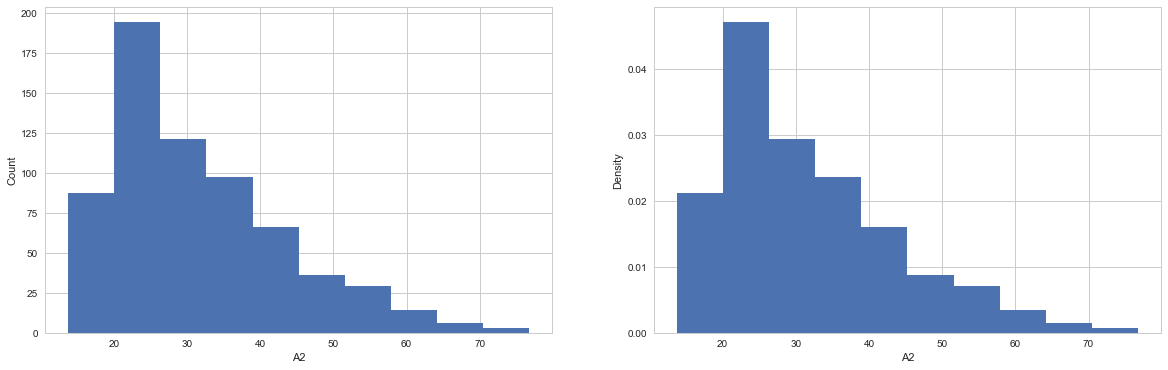

In [16]:
figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 2, 1)
axes.hist( data[ "A2"])
axes.set_ylabel( "Count")
axes.set_xlabel( "A2")

axes = figure.add_subplot(1, 2, 2)
axes.hist( data[ "A2"], normed=True)
axes.set_ylabel( "Density")
axes.set_xlabel( "A2")

plt.show()

A histogram of the data clearly shows that A2 is not normally distributed since mean and the median were not nearly the same.  The data distribution is heavily skewed toward left.  

Box plot

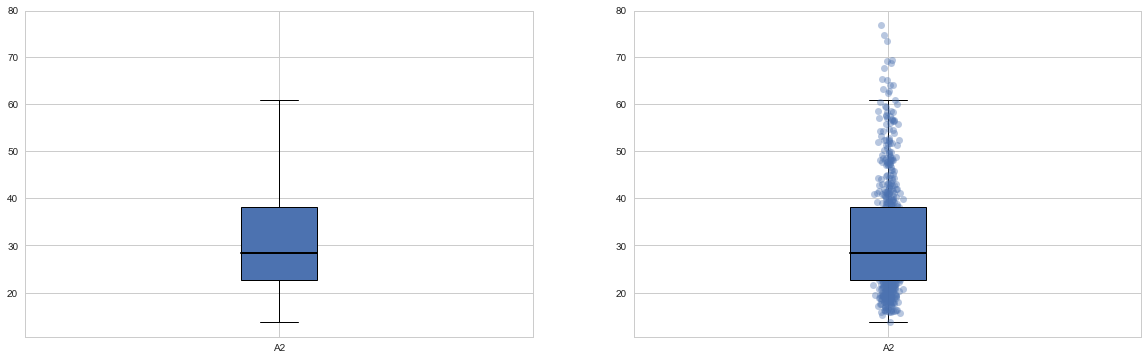

In [18]:
def restyle_boxplot( patch):
    ## change color and linewidth of the whiskers
    for whisker in patch['whiskers']:
        whisker.set(color='#000000', linewidth=1)

    ## change color and linewidth of the caps
    for cap in patch['caps']:
        cap.set(color='#000000', linewidth=1)

    ## change color and linewidth of the medians
    for median in patch['medians']:
        median.set(color='#000000', linewidth=2)

    ## change the style of fliers and their fill
    for flier in patch['fliers']:
        flier.set(marker='o', color='#000000', alpha=0.2)

figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 2, 1)
patch = axes.boxplot( data[ "A2"], labels=["A2"],  patch_artist=True)
restyle_boxplot( patch)

axes = figure.add_subplot(1, 2, 2)
patch = axes.boxplot( data[ "A2"], labels=["A2"], patch_artist=True)
restyle_boxplot( patch)
x = np.random.normal(1, 0.01, size=len(data["A2"]))
axes.plot(x, data[ "A2"], 'o', alpha=0.4)

plt.show()

The box-and-whisker's chart is not well balanced, the median is lower than the middle of the box (mean). The non-parametric statistics (Q1, median, Q3) does not suggest that the data is not normally distributed. And there are some extreme values at the higher end of the distribution above 70.

######  A3

Descriptive Statistics

In [19]:
data["A3"].describe()

count    653.000000
mean       4.829533
std        5.027077
min        0.000000
25%        1.040000
50%        2.835000
75%        7.500000
max       28.000000
Name: A3, dtype: float64

The mean is 4.83 with a standard deviation of 5.03 (a coefficient of variation of 104.14%). The mean and median are not exactly the same (mean = 4.83, median = 2.83) which suggests a asymmetric distribution. The range is 28. The interquartile range is 6.46.

Histogram

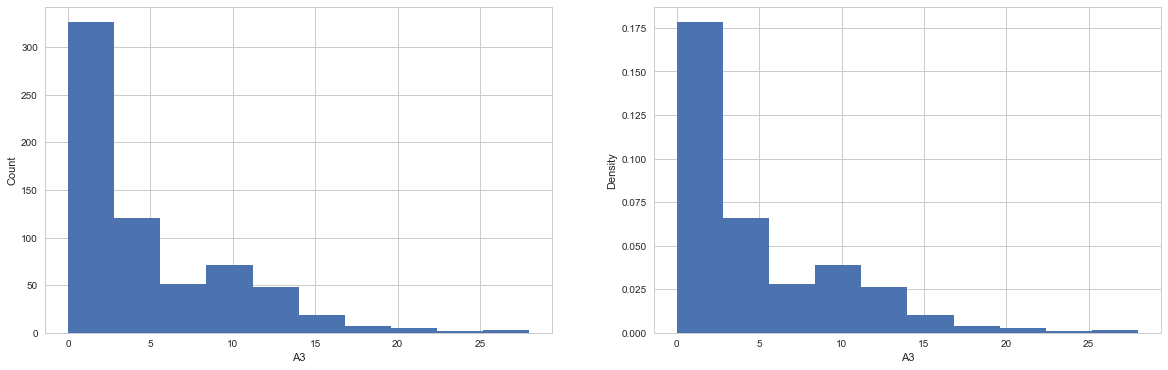

In [20]:
figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 2, 1)
axes.hist( data[ "A3"])
axes.set_ylabel( "Count")
axes.set_xlabel( "A3")

axes = figure.add_subplot(1, 2, 2)
axes.hist( data[ "A3"], normed=True)
axes.set_ylabel( "Density")
axes.set_xlabel( "A3")

plt.show()

Histogram above suggests that the data of A3 is not normally distributed since mean and the median were not nearly the same.  The data distribution is heavily skewed toward left and heavily concentrated between min and median values. 

Box Plot

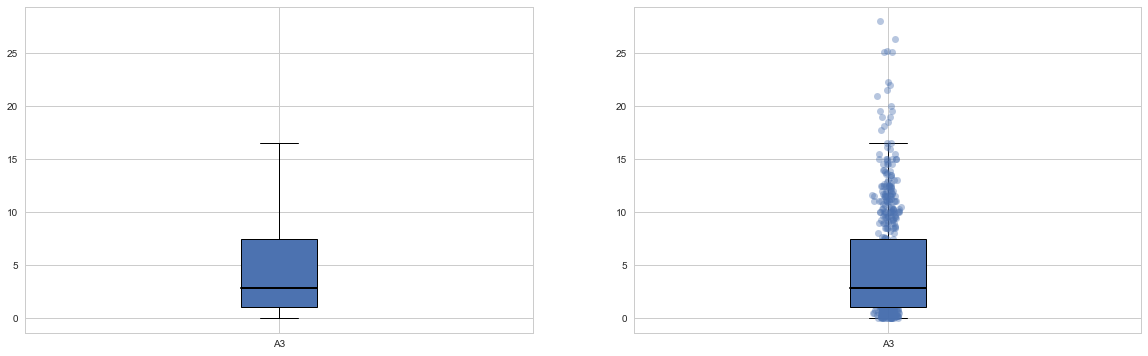

In [22]:
figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 2, 1)
patch = axes.boxplot( data[ "A3"], labels=["A3"], showfliers=True, patch_artist=True)
restyle_boxplot( patch)

axes = figure.add_subplot(1, 2, 2)
patch = axes.boxplot( data[ "A3"], labels=["A3"], patch_artist=True)
restyle_boxplot( patch)
x = np.random.normal(1, 0.01, size=len(data["A3"]))
axes.plot(x, data[ "A3"], 'o', alpha=0.4)

plt.show()

The box-and-whisker's chart is not well balanced, the median is lower than the middle of the box (mean). The location of the box suggest that the data is not normally distributed. And there are some extreme values at the higher end of the distribution above 25 while the most of them are heavily concentrated between min and Q3.

###### A8

Descriptive Statistics

In [23]:
data["A8"].describe()

count    653.000000
mean       2.244296
std        3.371120
min        0.000000
25%        0.165000
50%        1.000000
75%        2.625000
max       28.500000
Name: A8, dtype: float64

The mean is 2.24 with a standard deviation of 3.37 (a coefficient of variation of 150.45%). The mean and median are not exactly the same (mean = 2.24, median = 3.37) which suggests a asymmetric distribution. The range is 28.5. The interquartile range is 2.46.

Histogram

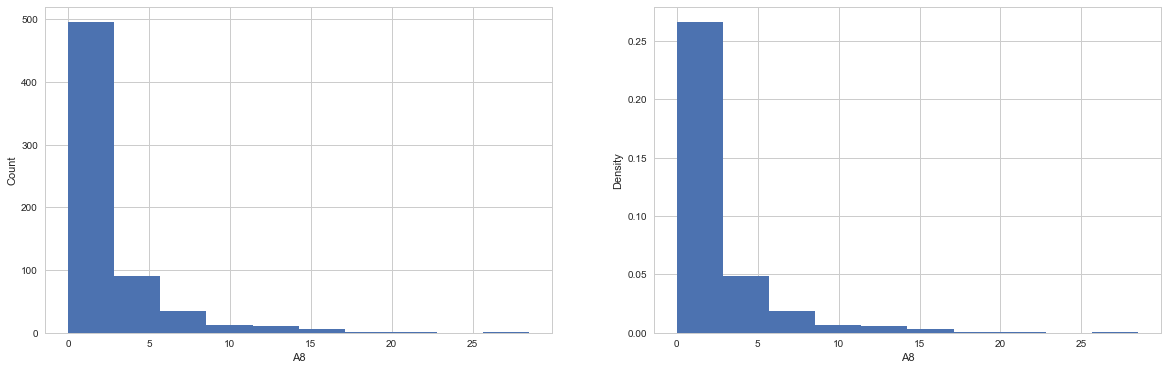

In [24]:
figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 2, 1)
axes.hist( data[ "A8"])
axes.set_ylabel( "Count")
axes.set_xlabel( "A8")

axes = figure.add_subplot(1, 2, 2)
axes.hist( data[ "A8"], normed=True)
axes.set_ylabel( "Density")
axes.set_xlabel( "A8")

plt.show()

Histogram confirms the distribution of A8 data is not normal since mean and the median were not nearly the same.  The data distribution is heavily skewed toward left and there appear to be some missing data around 25. 

Box Plot

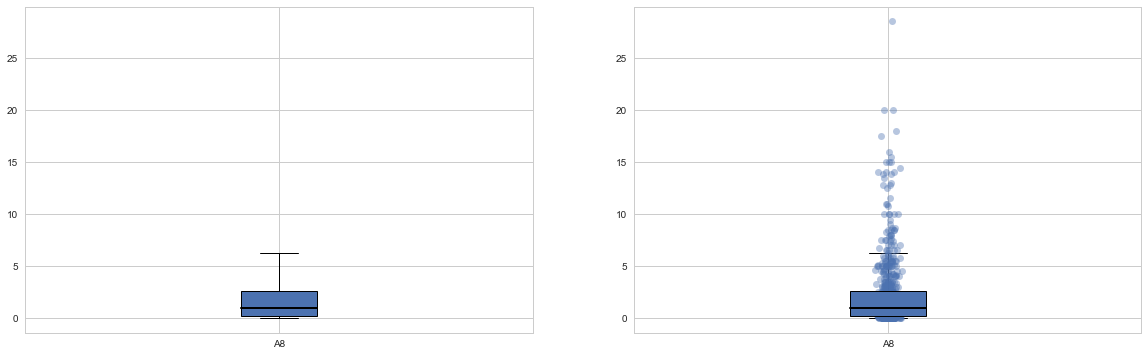

In [26]:
figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 2, 1)
patch = axes.boxplot( data[ "A8"], labels=["A8"], showfliers=True, patch_artist=True)
restyle_boxplot( patch)

axes = figure.add_subplot(1, 2, 2)
patch = axes.boxplot( data[ "A8"], labels=["A8"], patch_artist=True)
restyle_boxplot( patch)
x = np.random.normal(1, 0.01, size=len(data["A8"]))
axes.plot(x, data[ "A8"], 'o', alpha=0.4)

plt.show()

The box chart is not well balanced, the median is lower than the middle of the box (mean). The distribution in this diagram suggests that the data is not normally distributed. And there are some extreme values at the higher end of the distribution above 25.

###### A11

Descriptive Statistics

In [27]:
data["A11"].describe()

count    653.000000
mean       2.502297
std        4.968497
min        0.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       67.000000
Name: A11, dtype: float64

The mean is 2.50 with a standard deviation of 4.97 (a coefficient of variation of 198.8%). The mean and median are not exactly the same (mean = 2.50, median = 0) which suggests a asymmetric distribution. The range is 67. The interquartile range is 3.

Histogram

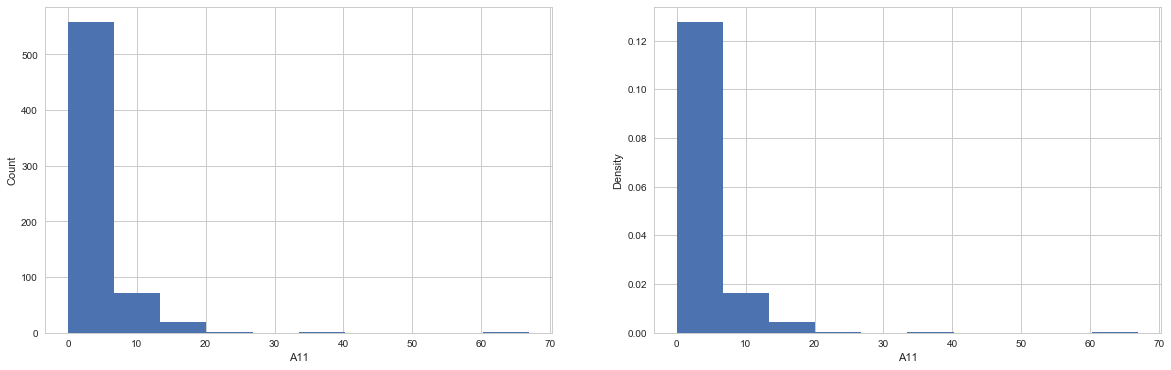

In [28]:
figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 2, 1)
axes.hist( data[ "A11"])
axes.set_ylabel( "Count")
axes.set_xlabel( "A11")

axes = figure.add_subplot(1, 2, 2)
axes.hist( data[ "A11"], normed=True)
axes.set_ylabel( "Density")
axes.set_xlabel( "A11")

plt.show()

Histogram of the data clearly suggests that A11 is not normally distributed since mean and the median were not the same.  The data distribution is heavily skewed toward left and there appear many missing data spots on the right side betwee 40 and 60 and around 30. 

Box Plot

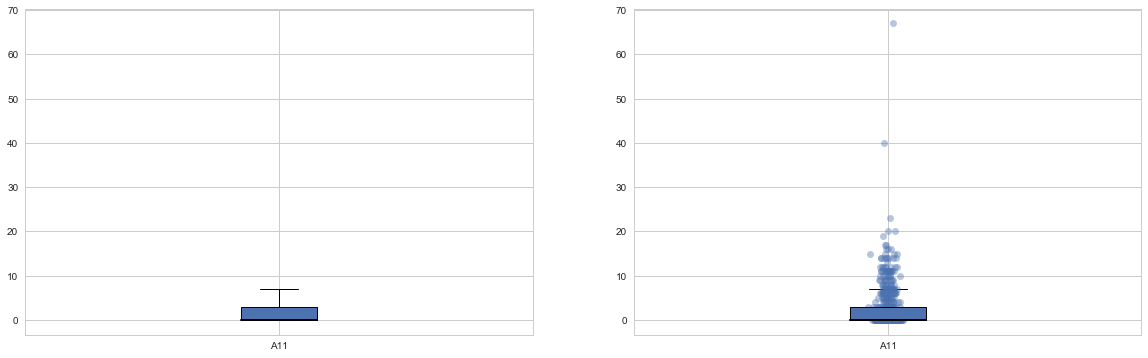

In [30]:
figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 2, 1)
patch = axes.boxplot( data[ "A11"], labels=["A11"], showfliers=True, patch_artist=True)
restyle_boxplot( patch)

axes = figure.add_subplot(1, 2, 2)
patch = axes.boxplot( data[ "A11"], labels=["A11"], patch_artist=True)
restyle_boxplot( patch)
x = np.random.normal(1, 0.01, size=len(data["A11"]))
axes.plot(x, data[ "A11"], 'o', alpha=0.4)

plt.show()

The box chart is clearly unbalanced, the median reaches 0 and touches the flat bottom of the box (median = min = Q1 = 0). The location of the box clearly suggest that the data is not normally distributed. And there are some extreme values at the higher end of the distribution above 60.

###### A14

Descriptive Statistics

In [31]:
data["A14"].describe()

count     653.000000
mean      180.359877
std       168.296811
min         0.000000
25%        73.000000
50%       160.000000
75%       272.000000
max      2000.000000
Name: A14, dtype: float64

The mean is 180.36 with a standard deviation of 168.30 (a coefficient of variation of 93.31%). The mean and median are not exactly the same (mean = 180.36, median = 160.0) which suggests a asymmetric distribution. The range is 2000. The interquartile range is 199.

Histogram

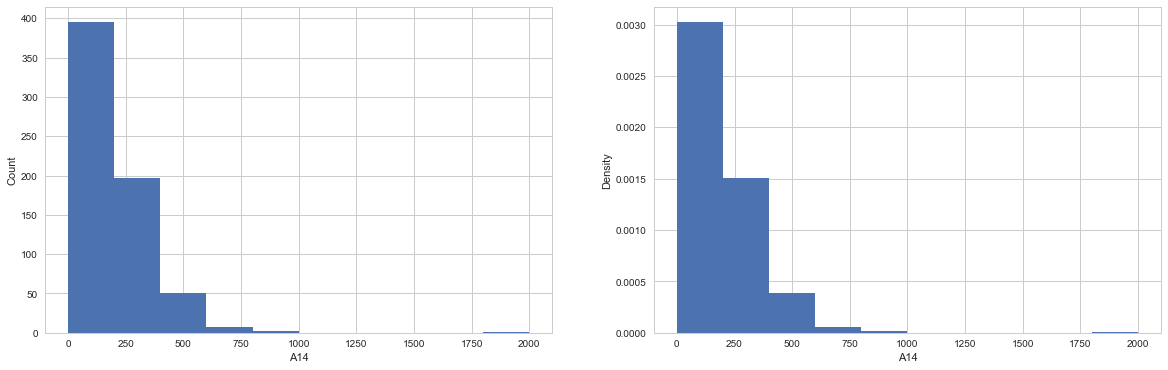

In [32]:
figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 2, 1)
axes.hist( data[ "A14"])
axes.set_ylabel( "Count")
axes.set_xlabel( "A14")

axes = figure.add_subplot(1, 2, 2)
axes.hist( data[ "A14"], normed=True)
axes.set_ylabel( "Density")
axes.set_xlabel( "A14")

plt.show()

Histogram of the data clearly shows that A14 is not normally distributed because mean and the median were not nearly the same.  The data distribution is heavily skewed toward left and there appears a missing data or a huge gap between 1000 and 1750. A14 seems to be a monthly payment that a qualified applicant pays every month.  

Box Plot

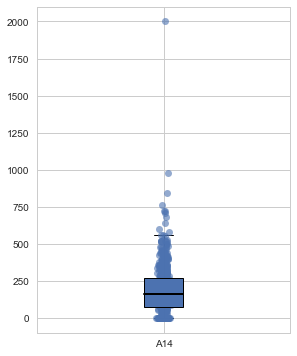

In [33]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 2, 1)

patch = axes.boxplot( data[ "A14"], labels=["A14"], patch_artist=True)
restyle_boxplot( patch)

x = np.random.normal(1, 0.01, size=len(data["A14"]))
axes.plot(x, data[ "A14"], 'o', alpha=0.6)

plt.show()
plt.close()

The box-and-whisker's chart is not well balanced, the median is lower than the middle of the box (mean). Most of the data appear between 0 and 500 and there are some extreme values at the higher end of the distribution above 70.

###### A15

Descriptive Statistics

In [34]:
data["A15"].describe()

count       653.000000
mean       1013.761103
std        5253.278504
min           0.000000
25%           0.000000
50%           5.000000
75%         400.000000
max      100000.000000
Name: A15, dtype: float64

The mean is 1013.76 with a standard deviation of 5253.28 (a coefficient of variation of 518.2%). The mean and median are not exactly the same (mean = 1013.76, median = 5) which suggests a asymmetric distribution. The range is 100000. The interquartile range is 400.

Histogram

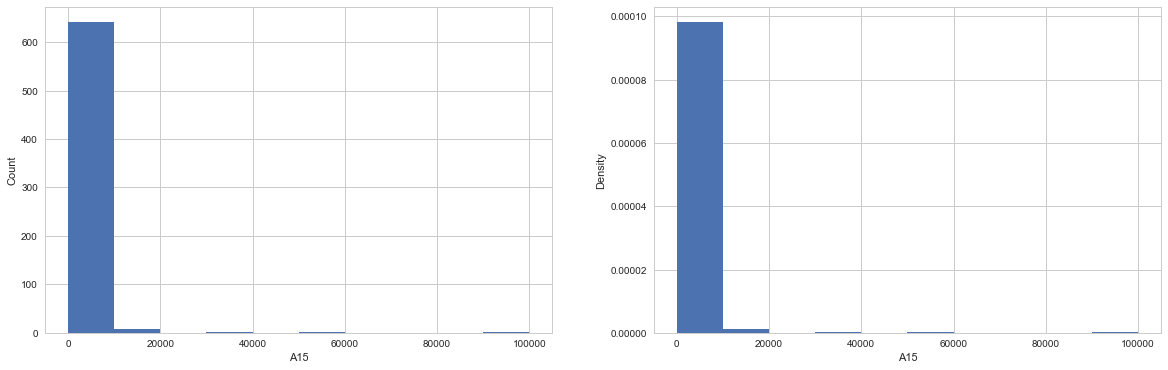

In [35]:
figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 2, 1)
axes.hist( data[ "A15"])
axes.set_ylabel( "Count")
axes.set_xlabel( "A15")

axes = figure.add_subplot(1, 2, 2)
axes.hist( data[ "A15"], normed=True)
axes.set_ylabel( "Density")
axes.set_xlabel( "A15")

plt.show()

Histogram of the data suggests that A15 is not normally distributed since mean and the median were not nearly the same.  The data distribution is heavily skewed toward left. A15 seems to be a loan amount that was approved for each qualified applicant.

Box Plot

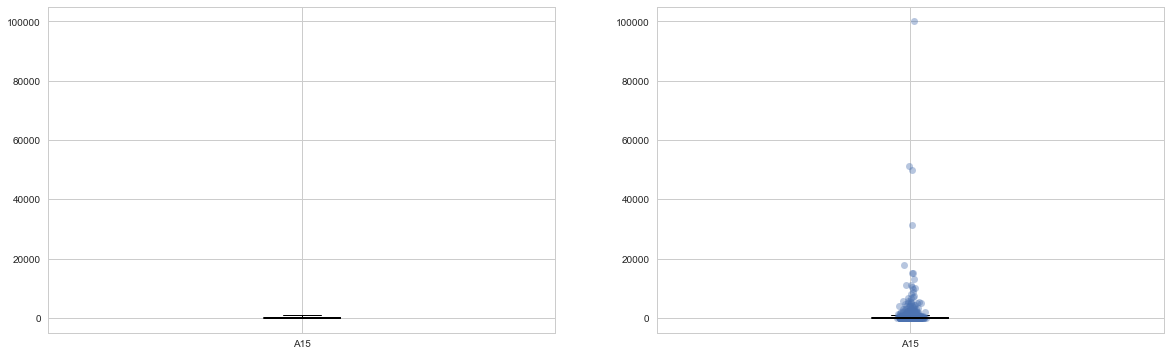

In [37]:
figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 2, 1)
patch = axes.boxplot( data[ "A15"], labels=["A15"], showfliers=True, patch_artist=True)
restyle_boxplot( patch)

axes = figure.add_subplot(1, 2, 2)
patch = axes.boxplot( data[ "A15"], labels=["A15"], patch_artist=True)
restyle_boxplot( patch)
x = np.random.normal(1, 0.01, size=len(data["A15"]))
axes.plot(x, data[ "A15"], 'o', alpha=0.4)

plt.show()

The box-and-whisker's chart does not appear in this diagram since there is a huge gap between mean and median since the median (= 5) is almost closed to the bottom while mean is 1013.76.   The distribution clearly suggests that the data is not normally distributed. And there are some extreme values at the higher end of the distribution above 80000.

Scatterplot matrices

/Users/christineyi/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  import sys


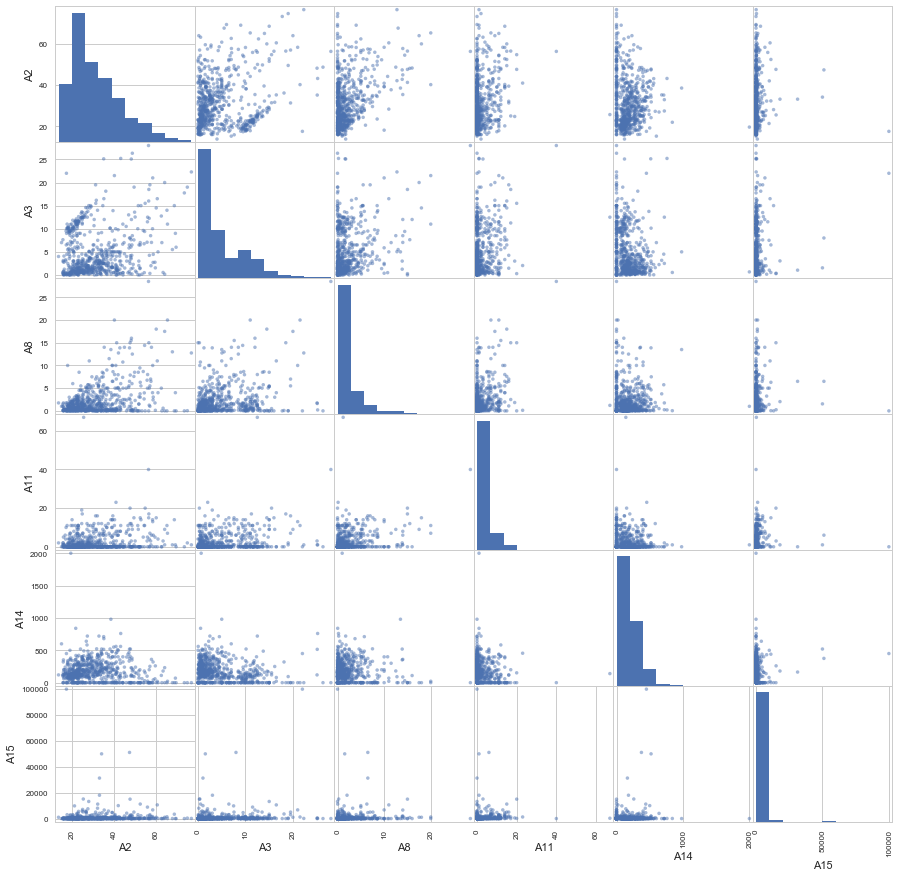

In [38]:
# Import scatter_matrix functionality

from pandas.tools.plotting import scatter_matrix

# Generate a scatterplot matrix with the continuous numerical variables

scat = scatter_matrix(data[['A2', 'A3', 'A8', 'A11', 'A14', 'A15', 'Class']], figsize=(15,15))

In [39]:
# Describe data correlation of numerical variables only

data.corr()

,A2,A3,A8,A11,A14,A15
A2,1.000000,0.217681,0.417647,0.198153,-0.084618,0.029078
A3,0.217681,1.000000,0.300600,0.269834,-0.217076,0.119754
A8,0.417647,0.300600,1.000000,0.327325,-0.064781,0.052159
A11,0.198153,0.269834,0.327325,1.000000,-0.116101,0.058408
A14,-0.084618,-0.217076,-0.064781,-0.116101,1.000000,0.073384
A15,0.029078,0.119754,0.052159,0.058408,0.073384,1.000000


Scatterplot matrices allow us to visualize linear dependency (linear correlation can show its dependency) between multiple variables (numerical variables only) at once.  We can also present a linear correlation in a chart as shown below.  If there is a strong correlation, the number will appear to be closed to 1.  0 represents there is no correlation between two variables and a negative number means a negative correlation between two numerical variables.

Heat map

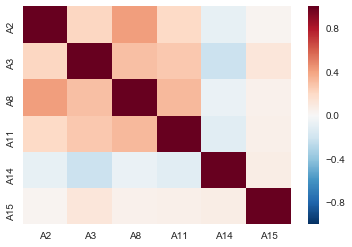

In [40]:
sns.heatmap(data.corr())
plt.show()

Hex binning for positive, negative and zero correlationship between two variables

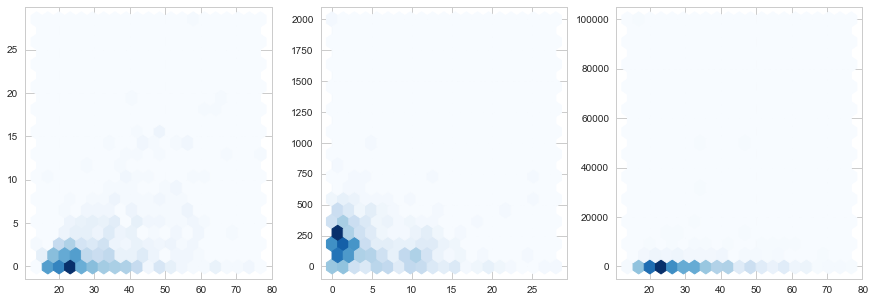

In [41]:
from matplotlib import cm

figure = plt.figure(figsize=(15, 5))

axes = figure.add_subplot(1, 3, 1)
axes.hexbin( data[ "A2"], data["A8"], gridsize=20, cmap=cm.Blues)

axes = figure.add_subplot(1, 3, 2)
axes.hexbin( data[ "A3"], data["A14"], gridsize=20, cmap=cm.Blues)

axes = figure.add_subplot(1, 3, 3)
axes.hexbin( data[ "A2"], data["A15"], gridsize=20, cmap=cm.Blues)

plt.show()

LOESS over our scatterplot

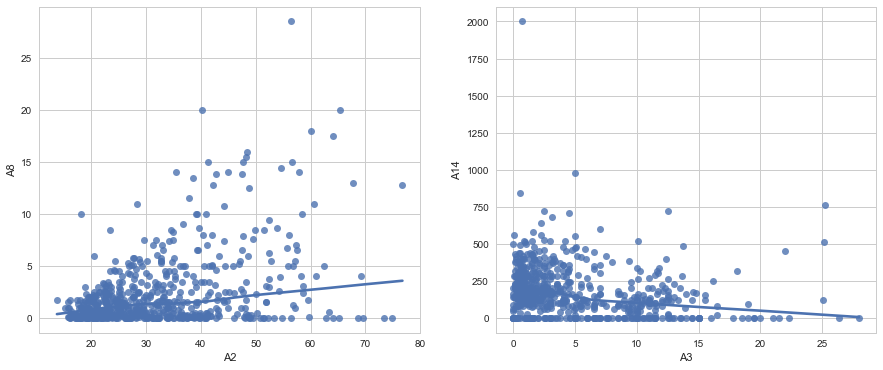

In [42]:
figure = plt.figure(figsize=(15, 6))

axes = figure.add_subplot(1, 2, 1)
sns.regplot( x= "A2", y= "A8", data = data, lowess=True)

axes = figure.add_subplot(1, 2, 2)
sns.regplot( x= "A3", y= "A14", data = data, lowess=True)

plt.show()

Likewise, a heat map above provides an immediate summary of correlation between two numerical variables and a gradation of different colors clearly helps to visualize positive and negative correlation in a matrix form.  It appears that there is a very weak positive correlation (0.42) between A2 and A8 above while A3 and A14 show a very weak negative correlationship (-0.22) as shown in LOESS over scatterplots.  

###### Categorical variables 

In [43]:
data[categorical_columns][0:11]

,A1,A4,A5,A6,A7,A9,A10,A12,A13,Class
0,b,u,g,w,v,t,t,f,g,+
1,a,u,g,q,h,t,t,f,g,+
2,a,u,g,q,h,t,f,f,g,+
3,b,u,g,w,v,t,t,t,g,+
4,b,u,g,w,v,t,f,f,s,+
5,b,u,g,m,v,t,f,t,g,+
6,b,u,g,r,h,t,f,t,g,+
7,a,u,g,cc,v,t,f,f,g,+
8,b,y,p,k,h,t,f,f,g,+
9,b,y,p,w,v,t,f,t,g,+


In [44]:
data[categorical_columns].describe()

,A1,A4,A5,A6,A7,A9,A10,A12,A13,Class
count,653,653,653,653,653,653,653,653,653,653
unique,2,3,3,14,9,2,2,2,3,2
top,b,u,g,c,v,t,f,f,g,-
freq,450,499,499,133,381,349,366,351,598,357


Above charts and In[10] show that there are 5 binary and 6 non-binary categorical variables in this dataset.  5 binary categorical variables are A1:[a,b], A9:[t,f], A10:[t,f], A12:[t,f] and 5 non-binaries are A4:[u,y,l], A5:[g,p,gg], A6:[w,q,m,r,cc,k,c,d,x,i,e,aa,ff,j], A7:[v,h,bb,ff,j,z,o,dd,n], A9:[t,f], A10:[t,f], A12:[t,f], A13:[g,s,p], Class:[+,-].

##### A1

In [45]:
data["A1"].describe()

count     653
unique      2
top         b
freq      450
Name: A1, dtype: object

Table chart

In [46]:
pd.crosstab(index= data["A1"], columns="count") 

col_0,count
A1,
a,203
b,450


Count Plot

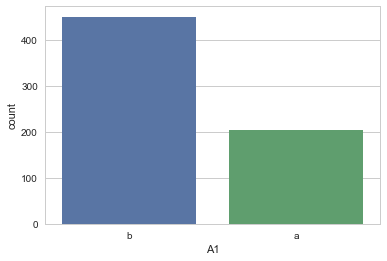

In [47]:
ax = sns.countplot(x="A1", data=data)

The bar chart above displays a binary count and there are more b (450) than a (203).

In [48]:
Credit_Approval = pd.crosstab(index= data["Class"], columns= data["A1"])
Credit_Approval.index= ["+","-"]
Credit_Approval

A1,a,b
+,95,201
-,108,249


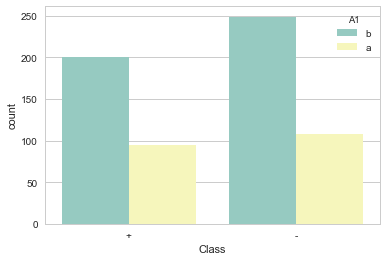

In [49]:
 ax = sns.countplot(x="Class", hue="A1", data=data, palette="Set3")

The countplot above shows a comparable result that there are more counts of b than a in both approved(+) and disapproved(-) cases.  For approved(+) case, there are more b(201) than a(95). Similarly, there are more b (249) than a (108) for disapproved credit cases as well.

Marginal Counts:  Totals for each row and column

In [50]:
Credit_Approval = pd.crosstab(index= data["Class"], columns= data["A1"], margins=True) 

Credit_Approval.columns = ["a","b","Total"]
Credit_Approval.index= ["+", "-", "Total"]
Credit_Approval

,a,b,Total
+,95,201,296
-,108,249,357
Total,203,450,653


Total proportion of counts

In [51]:
Credit_Approval/Credit_Approval.loc["Total","Total"]

,a,b,Total
+,0.145482,0.307810,0.453292
-,0.165391,0.381317,0.546708
Total,0.310873,0.689127,1.000000


Total proportion of counts suggests that there are more disapproved (0.55) credit cases than approved(0.45) cases.  And b is more likely to get approved (0.3) than a (0.1).

##### A4

In [52]:
data["A4"].describe()

count     653
unique      3
top         u
freq      499
Name: A4, dtype: object

In [53]:
pd.crosstab(index= data["A4"], columns="count") 

col_0,count
A4,
l,2
u,499
y,152


Count Plot

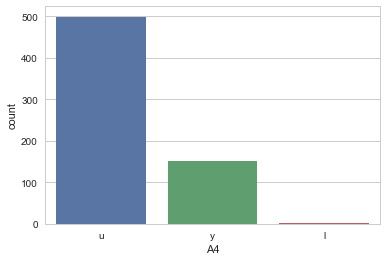

In [54]:
ax = sns.countplot(x="A4", data=data)

Count plot above shows the number of items in data A4.  u (499) appears to be the highest count. And the data points of y equals 152 and there are a few counts of l (2).

Table chart

In [55]:
Credit_Approval = pd.crosstab(index= data["Class"], columns= data["A4"])
Credit_Approval.index= ["+","-"]
Credit_Approval

A4,l,u,y
+,2,249,45
-,0,250,107


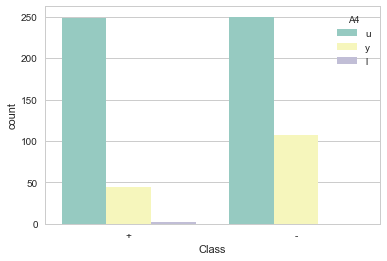

In [56]:
 ax = sns.countplot(x="Class", hue="A4", data=data, palette="Set3")

Above chart indicates a similar pattern of distribution of u, y and l for both approved (+) and disapproved (-) credit cases.  U is the highest counts (+: 249, -: 250) and l is the least (+: 2, -: 0).

Marginal Counts

In [57]:
Credit_Approval = pd.crosstab(index= data["Class"], columns= data["A4"], margins=True) 

Credit_Approval.columns = ["l","u","y","Total"]
Credit_Approval.index= ["+", "-", "Total"]
Credit_Approval

,l,u,y,Total
+,2,249,45,296
-,0,250,107,357
Total,2,499,152,653


Total Proportion of counts

In [58]:
Credit_Approval/Credit_Approval.loc["Total","Total"]

,l,u,y,Total
+,0.003063,0.381317,0.068913,0.453292
-,0.000000,0.382848,0.163859,0.546708
Total,0.003063,0.764165,0.232772,1.000000


Total proportional counts suggests that applicants in the category of u is more likely to get reviewed for credit approval than the category of y.  The applicants of category l does not seem to get reviewed for credit approval whether approved or disapproved.   

###### A5

In [59]:
data["A5"].describe()

count     653
unique      3
top         g
freq      499
Name: A5, dtype: object

In [60]:
pd.crosstab(index= data["A5"], columns="count") 

col_0,count
A5,
g,499
gg,2
p,152


Count Plot

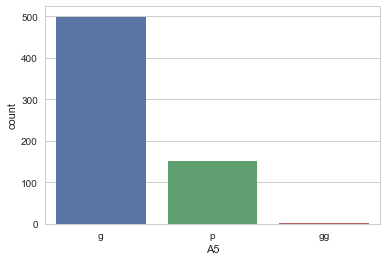

In [61]:
ax = sns.countplot(x="A5", data=data)

Table Chart

In [62]:
Credit_Approval = pd.crosstab(index= data["Class"], columns= data["A5"])
Credit_Approval.index= ["+","-"]
Credit_Approval

A5,g,gg,p
+,249,2,45
-,250,0,107


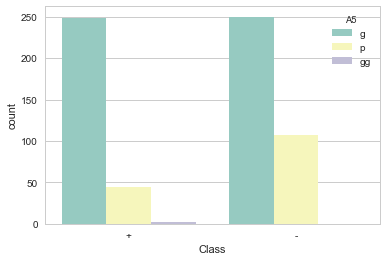

In [63]:
 ax = sns.countplot(x="Class", hue="A5", data=data, palette="Set3")

The chart above shows a similar pattern of distribution as in A4.  g is the highest count for both approved (+) and disapproved (-) credit cases.  p is the next highest counts (+: 45, -: 107) and gg is the least (+: 2, -: 0).

Marginal Counts

In [64]:
Credit_Approval = pd.crosstab(index= data["Class"], columns= data["A5"], margins=True) 

Credit_Approval.columns = ["g","gg","p","Total"]
Credit_Approval.index= ["+", "-", "Total"]
Credit_Approval

,g,gg,p,Total
+,249,2,45,296
-,250,0,107,357
Total,499,2,152,653


Total proportion of counts

In [65]:
Credit_Approval/Credit_Approval.loc["Total","Total"]

,g,gg,p,Total
+,0.381317,0.003063,0.068913,0.453292
-,0.382848,0.000000,0.163859,0.546708
Total,0.764165,0.003063,0.232772,1.000000


##### A6

In [66]:
data["A6"].describe()

count     653
unique     14
top         c
freq      133
Name: A6, dtype: object

In [67]:
pd.crosstab(index= data["A6"], columns="count") 

col_0,count
A6,
aa,52
c,133
cc,40
d,26
e,24
ff,50
i,55
j,10
k,48


Count Plot

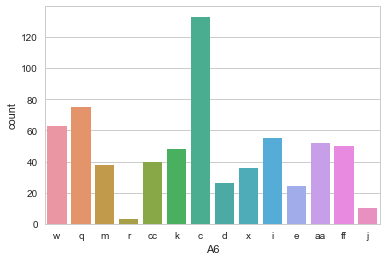

In [68]:
ax = sns.countplot(x="A6", data=data)

Count plot above displays a multiple non-binary count of A6 in different colors that c is the highest count and all other items are within the range between 3 and 75.

Table Chart

In [69]:
Credit_Approval = pd.crosstab(index= data["Class"], columns= data["A6"])
Credit_Approval.index= ["+","-"]
Credit_Approval

A6,aa,c,cc,d,e,ff,i,j,k,m,q,r,w,x
+,19,60,29,7,14,7,14,3,13,16,49,2,33,30
-,33,73,11,19,10,43,41,7,35,22,26,1,30,6


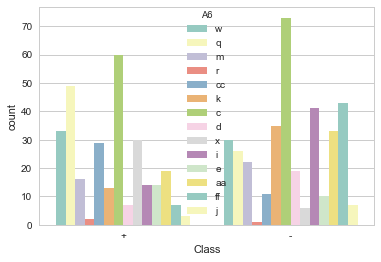

In [70]:
 ax = sns.countplot(x="Class", hue="A6", data=data, palette="Set3")

An item C appears to have the highest counts in A6 for both approved and disapproved cases.  There are 60 approved cases with C and 73 disapproved cases with C.  

Marginal Counts

In [71]:
Credit_Approval = pd.crosstab(index= data["Class"], columns= data["A6"], margins=True) 

Credit_Approval.columns = ["aa","c","cc","d","e","ff","i","j","k","m","q","r","w","x","Total"]
Credit_Approval.index= ["+", "-", "Total"]
Credit_Approval

,aa,c,cc,d,e,ff,i,j,k,m,q,r,w,x,Total
+,19,60,29,7,14,7,14,3,13,16,49,2,33,30,296
-,33,73,11,19,10,43,41,7,35,22,26,1,30,6,357
Total,52,133,40,26,24,50,55,10,48,38,75,3,63,36,653


Total proprtional of counts

In [72]:
Credit_Approval/Credit_Approval.loc["Total","Total"]

,aa,c,cc,d,e,ff,i,j,k,m,q,r,w,x,Total
+,0.029096,0.091884,0.044410,0.010720,0.021440,0.01072,0.021440,0.004594,0.019908,0.024502,0.075038,0.003063,0.050536,0.045942,0.453292
-,0.050536,0.111792,0.016845,0.029096,0.015314,0.06585,0.062787,0.010720,0.053599,0.033691,0.039816,0.001531,0.045942,0.009188,0.546708
Total,0.079632,0.203675,0.061256,0.039816,0.036753,0.07657,0.084227,0.015314,0.073507,0.058193,0.114855,0.004594,0.096478,0.055130,1.000000


Class (+,-) appears to respond to item C more strongly than any other items in A6.  

##### A7

In [73]:
data["A7"].describe()

count     653
unique      9
top         v
freq      381
Name: A7, dtype: object

In [74]:
pd.crosstab(index= data["A7"], columns="count") 

col_0,count
A7,
bb,53
dd,6
ff,54
h,137
j,8
n,4
o,2
v,381
z,8


Count Plot 

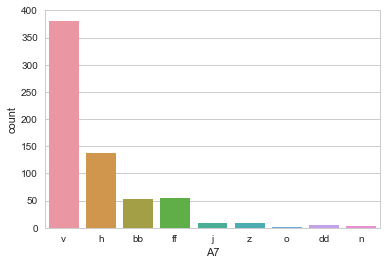

In [75]:
ax = sns.countplot(x="A7", data=data)

Table Chart

In [76]:
Credit_Approval = pd.crosstab(index= data["Class"], columns= data["A7"])
Credit_Approval.index= ["+","-"]
Credit_Approval

A7,bb,dd,ff,h,j,n,o,v,z
+,24,2,8,87,3,2,1,163,6
-,29,4,46,50,5,2,1,218,2


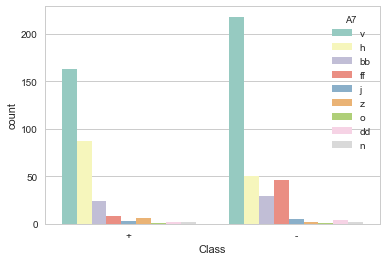

In [77]:
 ax = sns.countplot(x="Class", hue="A7", data=data, palette="Set3")

Marginal Counts

In [78]:
Credit_Approval = pd.crosstab(index= data["Class"], columns= data["A7"], margins=True) 

Credit_Approval.columns = ["bb","dd","ff","h","j","n","o","v","z","Total"]
Credit_Approval.index= ["+", "-", "Total"]
Credit_Approval

,bb,dd,ff,h,j,n,o,v,z,Total
+,24,2,8,87,3,2,1,163,6,296
-,29,4,46,50,5,2,1,218,2,357
Total,53,6,54,137,8,4,2,381,8,653


Total proportion of counts

In [79]:
Credit_Approval/Credit_Approval.loc["Total","Total"]

,bb,dd,ff,h,j,n,o,v,z,Total
+,0.036753,0.003063,0.012251,0.133231,0.004594,0.003063,0.001531,0.249617,0.009188,0.453292
-,0.044410,0.006126,0.070444,0.076570,0.007657,0.003063,0.001531,0.333844,0.003063,0.546708
Total,0.081164,0.009188,0.082695,0.209801,0.012251,0.006126,0.003063,0.583461,0.012251,1.000000


Class (+,-) responds to item v more strongly than any other items in A7 for both approved and disapproved cases.  The total marginal count of v is 381.

##### A9

In [80]:
data["A9"].describe()

count     653
unique      2
top         t
freq      349
Name: A9, dtype: object

In [81]:
pd.crosstab(index= data["A9"], columns="count") 

col_0,count
A9,
f,304
t,349


Count Plot

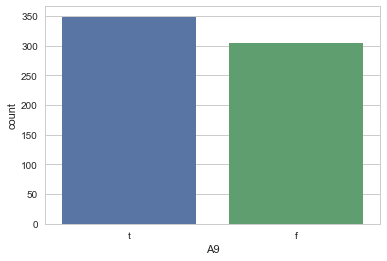

In [82]:
ax = sns.countplot(x="A9", data=data)

Count plot displays the binary categorical data of A9.  t appears to be 349 and f equals 304. 

Table Chart

In [83]:
Credit_Approval = pd.crosstab(index= data["Class"], columns= data["A9"])
Credit_Approval.index= ["+","-"]
Credit_Approval

A9,f,t
+,18,278
-,286,71


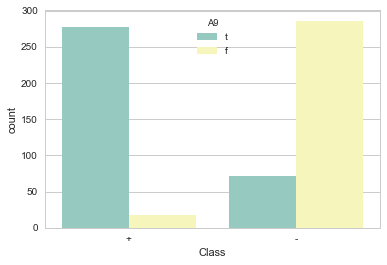

In [84]:
 ax = sns.countplot(x="Class", hue="A9", data=data, palette="Set3")

Above chart shows the most interesting relationship between two item (t,f) in A9.  When t appears more likely in approved(+: 278) cases, most of f appears in disapproved(-: 286). There seems to be a strong relationship between responding variable Class (+,-) and each item(t,f) in this input variable A9.

Marginal Counts

In [85]:
Credit_Approval = pd.crosstab(index= data["Class"], columns= data["A9"], margins=True) 

Credit_Approval.columns = ["f","t","Total"]
Credit_Approval.index= ["+", "-", "Total"]
Credit_Approval

,f,t,Total
+,18,278,296
-,286,71,357
Total,304,349,653


Total proportion of counts

In [86]:
Credit_Approval/Credit_Approval.loc["Total","Total"]

,f,t,Total
+,0.027565,0.425727,0.453292
-,0.437979,0.108729,0.546708
Total,0.465544,0.534456,1.000000


##### A10

In [87]:
data["A10"].describe()

count     653
unique      2
top         f
freq      366
Name: A10, dtype: object

In [88]:
pd.crosstab(index= data["A10"], columns="count") 

col_0,count
A10,
f,366
t,287


Count Plot

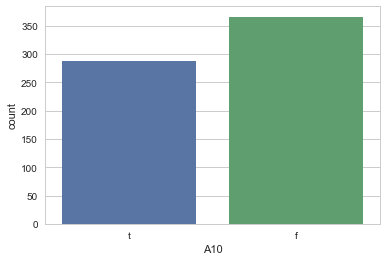

In [89]:
ax = sns.countplot(x="A10", data=data)

Table chart

In [90]:
Credit_Approval = pd.crosstab(index= data["Class"], columns= data["A10"])
Credit_Approval.index= ["+","-"]
Credit_Approval

A10,f,t
+,93,203
-,273,84


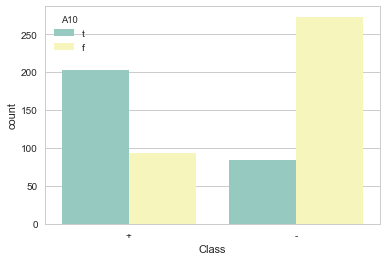

In [91]:
 ax = sns.countplot(x="Class", hue="A10", data=data, palette="Set3")

Marginal Counts

In [92]:
Credit_Approval = pd.crosstab(index= data["Class"], columns= data["A10"], margins=True) 

Credit_Approval.columns = ["f","t","Total"]
Credit_Approval.index= ["+", "-", "Total"]
Credit_Approval

,f,t,Total
+,93,203,296
-,273,84,357
Total,366,287,653


Total proportion of counts

In [93]:
Credit_Approval/Credit_Approval.loc["Total","Total"]

,f,t,Total
+,0.14242,0.310873,0.453292
-,0.41807,0.128637,0.546708
Total,0.56049,0.439510,1.000000


Cross table above shows a similar result in categorical variable A9 that t is more likely to appear in approved(+: 203) cases than disapporved (-: 84) and f appears more frequently in disapproved(-: 273) than approved(+: 93) cases. 

##### A12

In [94]:
data["A12"].describe()

count     653
unique      2
top         f
freq      351
Name: A12, dtype: object

In [95]:
pd.crosstab(index= data["A12"], columns="count") 

col_0,count
A12,
f,351
t,302


Count Plot

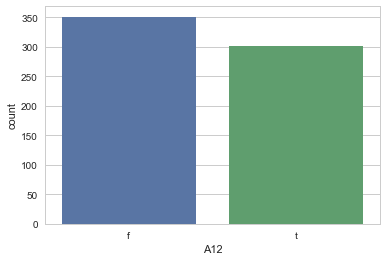

In [96]:
ax = sns.countplot(x="A12", data=data)

Above diagram shows that f (351) was more counted than t (302).

Table chart

In [97]:
Credit_Approval = pd.crosstab(index= data["Class"], columns= data["A12"])
Credit_Approval.index= ["+","-"]
Credit_Approval

A12,f,t
+,151,145
-,200,157


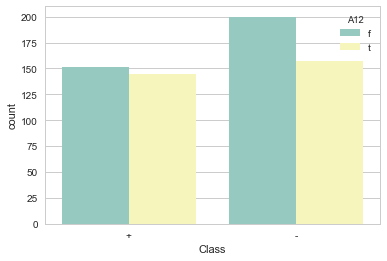

In [98]:
 ax = sns.countplot(x="Class", hue="A12", data=data, palette="Set3")

Marginal Counts

In [99]:
Credit_Approval = pd.crosstab(index= data["Class"], columns= data["A12"], margins=True) 

Credit_Approval.columns = ["f","t","Total"]
Credit_Approval.index= ["+", "-", "Total"]
Credit_Approval

,f,t,Total
+,151,145,296
-,200,157,357
Total,351,302,653


Total proportion of counts

In [100]:
Credit_Approval/Credit_Approval.loc["Total","Total"]

,f,t,Total
+,0.231240,0.222052,0.453292
-,0.306279,0.240429,0.546708
Total,0.537519,0.462481,1.000000


##### A13

In [101]:
data["A13"].describe()

count     653
unique      3
top         g
freq      598
Name: A13, dtype: object

In [102]:
pd.crosstab(index= data["A13"], columns="count") 

col_0,count
A13,
g,598
p,2
s,53


Count Plot

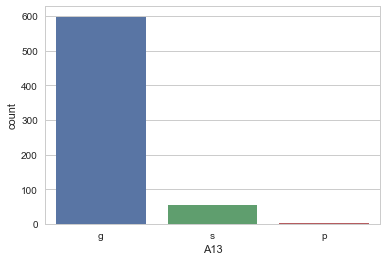

In [103]:
ax = sns.countplot(x="A13", data=data)

Table chart

In [104]:
Credit_Approval = pd.crosstab(index= data["Class"], columns= data["A13"])
Credit_Approval.index= ["+","-"]
Credit_Approval

A13,g,p,s
+,280,1,15
-,318,1,38


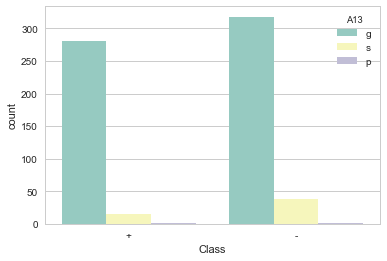

In [105]:
 ax = sns.countplot(x="Class", hue="A13", data=data, palette="Set3")

Marginal Counts

In [106]:
Credit_Approval = pd.crosstab(index= data["Class"], columns= data["A13"], margins=True) 

Credit_Approval.columns = ["g","s","p","Total"]
Credit_Approval.index= ["+", "-", "Total"]
Credit_Approval

,g,s,p,Total
+,280,1,15,296
-,318,1,38,357
Total,598,2,53,653


Total proportion of counts

In [107]:
Credit_Approval/Credit_Approval.loc["Total","Total"]

,g,s,p,Total
+,0.428790,0.001531,0.022971,0.453292
-,0.486983,0.001531,0.058193,0.546708
Total,0.915773,0.003063,0.081164,1.000000


##### Class

In [108]:
data["Class"].describe()

count     653
unique      2
top         -
freq      357
Name: Class, dtype: object

Table chart

In [109]:
pd.crosstab(index= data["Class"], columns="count") 

col_0,count
Class,
+,296
-,357


Count Plot

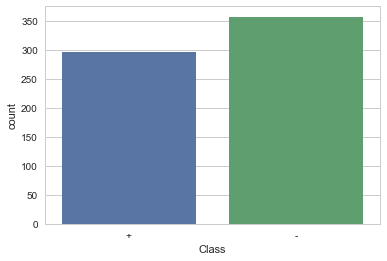

In [110]:
ax = sns.countplot(x="Class", data=data)

##### Conclusion

Both ETL and EDA suggest that the dataset of Credit_Approval contain three different sets of variables.   They are numerical variables, binary categorical varriables and non-binary categorical variables.  Numerical variables seem to require normalization in order to avoid a huge impacts on model accuracy due to its large numeric value range.  Both binary and nonbinary categorical variables need to be tranformed as well using dummy variable. Further data tranformation is required for a bootstrap logistic regression.

In [111]:
data.columns = ['A' + str(i) for i in range(1, 16)] + ['Class']
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Class
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [112]:
# Drop rows with missing values 
data = data.dropna()
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Class
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


#### 1. Separate numbrical and categorical variables¶

In [113]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13', 'Class']
['A2', 'A3', 'A8', 'A11', 'A14', 'A15']


In [114]:
data_describe = data.describe(include=[object])
data_describe

,A1,A4,A5,A6,A7,A9,A10,A12,A13,Class
count,653,653,653,653,653,653,653,653,653,653
unique,2,3,3,14,9,2,2,2,3,2
top,b,u,g,c,v,t,f,f,g,-
freq,450,499,499,133,381,349,366,351,598,357


#### 2. Separate binary and non-binary categorical variables


In [115]:
binary_columns = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['A1', 'A9', 'A10', 'A12', 'Class'] ['A4', 'A5', 'A6', 'A7', 'A13']


#### - Transform binary categorical variables using dummy variable


In [116]:
for c in binary_columns[0:]:
    top = data_describe[c]['top']
    top_items = data[c] == top
    data.loc[top_items, c] = 0
    data.loc[np.logical_not(top_items), c] = 1

In [117]:
data[binary_columns].describe()

,A1,A9,A10,A12,Class
count,653,653,653,653,653
unique,2,2,2,2,2
top,0,0,0,0,0
freq,450,349,366,351,357


#### - Transform nonbinary categorical variables using dummy variables

In [118]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['A4_l', 'A4_u', 'A4_y', 'A5_g', 'A5_gg', 'A5_p', 'A6_aa', 'A6_c',
       'A6_cc', 'A6_d', 'A6_e', 'A6_ff', 'A6_i', 'A6_j', 'A6_k', 'A6_m',
       'A6_q', 'A6_r', 'A6_w', 'A6_x', 'A7_bb', 'A7_dd', 'A7_ff', 'A7_h',
       'A7_j', 'A7_n', 'A7_o', 'A7_v', 'A7_z', 'A13_g', 'A13_p', 'A13_s'],
      dtype='object')


#### 3. Normalization of numerical features: Scaled by 2x std as suggested in 070.1 - Linear Regression

In [119]:
scaled_numerical = data[numerical_columns]
scaled_numerical = (scaled_numerical - scaled_numerical.mean()) / (2.0 * scaled_numerical.std())
scaled_numerical.describe()

,A2,A3,A8,A11,A14,A15
count,6.530000e+02,6.530000e+02,6.530000e+02,6.530000e+02,6.530000e+02,6.530000e+02
mean,-1.454426e-15,5.474607e-17,3.029736e-16,1.902511e-16,-1.462162e-17,-1.283005e-16
std,5.000000e-01,5.000000e-01,5.000000e-01,5.000000e-01,5.000000e-01,5.000000e-01
min,-7.498485e-01,-4.803520e-01,-3.328709e-01,-2.518163e-01,-5.358387e-01,-9.648842e-02
25%,-3.769054e-01,-3.769121e-01,-3.083983e-01,-2.518163e-01,-3.189599e-01,-9.648842e-02
50%,-1.302477e-01,-1.983790e-01,-1.845522e-01,-2.518163e-01,-6.048801e-02,-9.601253e-02
75%,2.849313e-01,2.656083e-01,5.646557e-02,5.008586e-02,2.722575e-01,-5.841696e-02
max,1.911014e+00,2.304566e+00,3.894211e+00,6.490666e+00,5.406045e+00,9.421377e+00


#### 4. Concatenation of all feature columns in one table

In [120]:
data = pd.concat((scaled_numerical, data[binary_columns], data_nonbinary), axis=1)
data = pd.DataFrame(data, dtype=float)
print(data.shape)
print(data.columns)

(653, 43)
Index(['A2', 'A3', 'A8', 'A11', 'A14', 'A15', 'A1', 'A9', 'A10', 'A12',
       'Class', 'A4_l', 'A4_u', 'A4_y', 'A5_g', 'A5_gg', 'A5_p', 'A6_aa',
       'A6_c', 'A6_cc', 'A6_d', 'A6_e', 'A6_ff', 'A6_i', 'A6_j', 'A6_k',
       'A6_m', 'A6_q', 'A6_r', 'A6_w', 'A6_x', 'A7_bb', 'A7_dd', 'A7_ff',
       'A7_h', 'A7_j', 'A7_n', 'A7_o', 'A7_v', 'A7_z', 'A13_g', 'A13_p',
       'A13_s'],
      dtype='object')


#### Transformed 'Credit_Approval.csv' dataset¶

In [121]:
data[0:11]

,A2,A3,A8,A11,A14,A15,A1,A9,A10,A12,...,A7_ff,A7_h,A7_j,A7_n,A7_o,A7_v,A7_z,A13_g,A13_p,A13_s
0,-0.028459,-0.480352,-0.147473,-0.151182,0.064292,-0.096488,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1.147389,-0.036754,0.118018,0.351988,-0.408088,-0.043188,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.295812,-0.430621,-0.110393,-0.251816,0.296025,-0.018061,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.155167,-0.327181,0.223324,0.251354,-0.238745,-0.096203,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,-0.478694,0.079118,-0.079246,-0.251816,-0.179326,-0.096488,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5,0.024336,-0.082506,0.037926,-0.251816,0.533700,-0.096488,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
6,0.070373,-0.376912,0.631200,-0.251816,-0.048604,2.881176,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,-0.362545,0.671908,-0.326938,-0.251816,-0.298163,0.031908,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
8,0.967886,-0.430621,0.254471,-0.251816,-0.001069,-0.066602,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,0.464434,0.008501,0.136558,-0.251816,-0.381350,0.040759,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [122]:
data.shape

(653, 43)

Subsets of dummy variable (non-binary categorical variables) were added to the original dataset and expanded the size of original data shape from 653 x 16 to 653 x 43.

### Bootstrap Logistic Regression Model:  

#### Select target variable (Y) and input characteristics (X)
'Class' is a target or dependent variable (Y) and the input characteristics of all subset features as X.

In [123]:
X = data.drop(('Class'), axis=1)  
Y = data['Class']
feature_names = X.columns
print(feature_names)

Index(['A2', 'A3', 'A8', 'A11', 'A14', 'A15', 'A1', 'A9', 'A10', 'A12', 'A4_l',
       'A4_u', 'A4_y', 'A5_g', 'A5_gg', 'A5_p', 'A6_aa', 'A6_c', 'A6_cc',
       'A6_d', 'A6_e', 'A6_ff', 'A6_i', 'A6_j', 'A6_k', 'A6_m', 'A6_q', 'A6_r',
       'A6_w', 'A6_x', 'A7_bb', 'A7_dd', 'A7_ff', 'A7_h', 'A7_j', 'A7_n',
       'A7_o', 'A7_v', 'A7_z', 'A13_g', 'A13_p', 'A13_s'],
      dtype='object')


In [124]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 11)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 
print(N_train, N_test)

522 131


In [125]:
from sklearn.linear_model import LogisticRegression
m = LogisticRegression()
m.fit(X_train, Y_train)

err_train = np.mean(Y_train != m.predict(X_train))
err_test  = np.mean(Y_test  != m.predict(X_test))
print(err_train, err_test)

0.10153256705 0.145038167939


### Bootstrap Inference for Logistic Regression

In [126]:
result = regression.bootstrap_logm( "Class ~ A2 + A3 + A8 + A11 + A14 + A15 + A1 + A9 + A10 + A12 + A4_l + A4_u + A4_y + A5_g + A5_gg + A5_p + A6_aa + A6_c + A6_cc+ A6_d + A6_e + A6_ff + A6_i + A6_j + A6_k + A6_m + A6_q + A6_r + A6_w + A6_x + A7_bb + A7_dd + A7_ff + A7_h + A7_j + A7_n + A7_o +A7_v + A7_z + A13_g + A13_p + A13_s", data = data)
regression.describe_bootstrap_fit( result)

regression:  Class ~ A2 + A3 + A8 + A11 + A14 + A15 + A1 + A9 + A10 + A12 + A4_l + A4_u + A4_y + A5_g + A5_gg + A5_p + A6_aa + A6_c + A6_cc+ A6_d + A6_e + A6_ff + A6_i + A6_j + A6_k + A6_m + A6_q + A6_r + A6_w + A6_x + A7_bb + A7_dd + A7_ff + A7_h + A7_j + A7_n + A7_o +A7_v + A7_z + A13_g + A13_p + A13_s
n:  653
----------
intercept:  0.523840424074 [0.15367292536541588, 0.7356965355763833]
A2:  0.126463393371 [-0.30808426319005516, 0.6019907518797585]
A3:  -0.171702157512 [-0.534308567225247, 0.3356108740819874]
A8:  0.540411358131 [0.04187308229360901, 1.1943034596799578]
A11:  1.03490369941 [0.328973371018401, 1.9723041327899642]
A14:  -0.60770197193 [-1.180529390617147, -0.036120428882519394]
A15:  1.78687225997 [1.1697887024107145, 2.2134234696373287]
A1:  0.023384865406 [-0.4067133978195282, 0.5741831900173323]
A9:  -3.24671757958 [-3.8618302108208153, -2.7295671435881053]
A10:  0.586914560892 [0.0858235936079596, 1.1236196920346269]
A12:  -0.118765611883 [-0.5197591286340804, 0.

The log odds of intercept and coefficients must be converted into probabilities to interprest them in some meaningful ways as shown below.

In [127]:
# Interpret the intercept
intercept = result['coefficients'][0]
p = regression.logistic(intercept)

# Get 95% CI
bounds = result['resampled_coefficients'].quantile([0.025, 0.975])
bounds = bounds.transpose()
bounds = bounds.values.tolist()
lower, upper = bounds[0][0], bounds[0][1]
lower_p = regression.logistic(lower)
upper_p = regression.logistic(upper)

print( "P(Class = 1) is {0:.2F}%, with a 95% CI of {1:.2F}% to {2:.2F}%, when x1=0 and x2=0".format(p * 100
                                                                                          , lower_p * 100
                                                                                          , upper_p * 100))

P(Class = 1) is 62.80%, with a 95% CI of 53.83% to 67.61%, when x1=0 and x2=0


In [128]:
regression.logistic( 0.06559499249650204)

0.51639287074102469

In [129]:
regression.logistic( 0.8458110343300937)

0.69968767371057095

The probability of credit approval is 62.8% if all other variables or regressors are set to equal to 0. We can think of this value (0.52384) as the prior log odds when running bootstrap logistic regression without any regressors. The 95% Confidence Intervals for the intercept is quite narrow compared to other coefficients (Please see In[25]) . β0 is estimated at 0.628 and the range of the 95% CI says its +/- 14%.

#### Display important features using Random Forest(RF)

The purpose of feature selection is to find unnecessary features that will overfit the model. By eliminating their noisy characteristics, we can reduce the algorithm error when testing the sample and increase model accuracy. So I have tried Random Forrest to select important features that influence our target variable (Class) in this dataset. In general, random forest is the most popular approach for selecting feature ranking and can also fit different models to different subsets of the data. And it is based on the impurity reduction or impurity based ranking and prefers towards variables with more categories*. Most importantly, I have found some difficulties of using logistic regression for feature selection since sklearn does not support "feature-importance-" as its attribute for LogisticRegression.

In [130]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 11)

In [131]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators=100, random_state=11)
rf.fit(X_train, Y_train)

err_train = np.mean(Y_train != rf.predict(X_train))
err_test  = np.mean(Y_test  != rf.predict(X_test))
print(err_train, err_test)

0.0 0.129770992366


In [132]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature importances:")

for f, idx in enumerate(indices):
    print("{:2d}. feature '{:5s}' ({:.4f})".format(f + 1, feature_names[idx], importances[idx]))

Feature importances:
 1. feature 'A9   ' (0.2821)
 2. feature 'A15  ' (0.1004)
 3. feature 'A8   ' (0.0958)
 4. feature 'A11  ' (0.0795)
 5. feature 'A3   ' (0.0687)
 6. feature 'A14  ' (0.0637)
 7. feature 'A2   ' (0.0606)
 8. feature 'A10  ' (0.0527)
 9. feature 'A1   ' (0.0128)
10. feature 'A7_h ' (0.0126)
11. feature 'A12  ' (0.0123)
12. feature 'A6_k ' (0.0102)
13. feature 'A6_ff' (0.0100)
14. feature 'A6_q ' (0.0097)
15. feature 'A6_w ' (0.0094)
16. feature 'A5_p ' (0.0086)
17. feature 'A7_v ' (0.0086)
18. feature 'A6_c ' (0.0086)
19. feature 'A6_cc' (0.0086)
20. feature 'A6_x ' (0.0081)
21. feature 'A13_g' (0.0077)
22. feature 'A6_i ' (0.0077)
23. feature 'A4_u ' (0.0072)
24. feature 'A4_y ' (0.0070)
25. feature 'A13_s' (0.0069)
26. feature 'A5_g ' (0.0068)
27. feature 'A7_bb' (0.0060)
28. feature 'A7_ff' (0.0057)
29. feature 'A6_aa' (0.0049)
30. feature 'A6_m ' (0.0042)
31. feature 'A6_d ' (0.0041)
32. feature 'A7_n ' (0.0024)
33. feature 'A6_e ' (0.0014)
34. feature 'A5_gg' (0

(-1, 42)

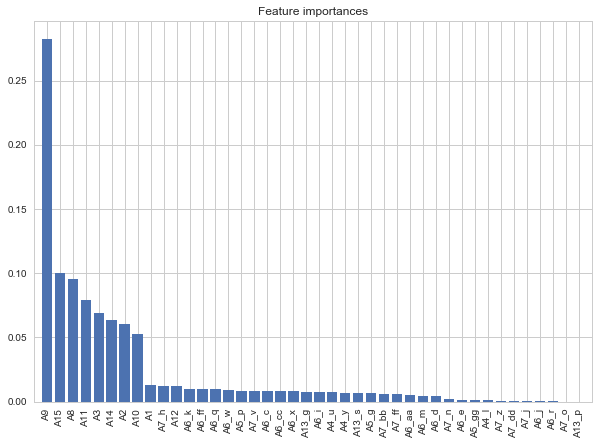

In [133]:
d_first = 42
plt.figure(figsize=(10, 7))
plt.title("Feature importances")
plt.bar(range(d_first), importances[indices[:d_first]], align='center')
plt.xticks(range(d_first), np.array(feature_names)[indices[:d_first]], rotation=90)
plt.xlim([-1, d_first])

In [134]:
# Display best features

best_features = indices[:8]
best_features_names = feature_names[best_features]
print(best_features_names)

Index(['A9', 'A15', 'A8', 'A11', 'A3', 'A14', 'A2', 'A10'], dtype='object')


### Model Performance

##### Learning Curves

The main purpose of learning curve is to diagnose model's learning and testing performances on various subsets of training set. With a graphical representation of model performances, we can easily spot the high bias and high variance problems.

In [137]:
def mse( errors):
    n = len( errors)
    squared_error = np.sum( [e**2 for e in errors])
    return np.sqrt((1.0/n) * squared_error)

In [138]:
from copy import deepcopy

def cross_validate( formula, data, test_size=0.20):
    training_mses = []
    test_mses = []
    
    n = data.shape[ 0]
    test_n = int( np.round( test_size * n, 0))

    indices = deepcopy( data.index).values
    random.shuffle( indices)

    test_indices = indices[ 0:test_n]
    training_indices = indices[test_n:]

    test_set = data.loc[ test_indices]
    training_set = data.loc[ training_indices]

    Y, X = patsy.dmatrices( formula, training_set, return_type="matrix")
    model = linear.LinearRegression( fit_intercept=False).fit( X, Y)
    Y_hat = model.predict( X)

    training_mse = mse( Y - Y_hat)

    Y, X = patsy.dmatrices( formula, test_set, return_type="matrix")
    Y_hat = model.predict( X)

    test_mse = mse( Y - Y_hat)

    return training_mse, test_mse

In [139]:
#Cross Validate with 8 best features

cross_validate("Class ~ A9 + A11 + A8 + A15 + A3 + A14 + A2 + A10", data = data)

(0.31076221168118123, 0.35220293867030555)

In [140]:
from copy import deepcopy

def test_train_split( algorithm, formula, data, evaluate, test_size=0.20):
    training_mses = []
    test_mses = []
    
    n = data.shape[ 1]
    test_n = int( np.round( test_size * n, 1))

    indices = list( range(1, len( data)))
    random.shuffle( indices)
    test_indices = indices[ 1:test_n]
    training_indices = indices[test_n:]

    test_set = data.iloc[ test_indices]
    training_set = data.iloc[ training_indices]

    result = algorithm( formula, training_set)
    model = result["model"]
    Y, X = patsy.dmatrices( formula, training_set, return_type="matrix")
#    model = linear.LinearRegression( fit_intercept=False).fit( X, Y)
    Y_hat = model.predict( X)
    training_mse = evaluate( Y, Y_hat)

    Y, X = patsy.dmatrices( formula, test_set, return_type="matrix")
    Y_hat = model.predict( X)
    test_mse = evaluate( Y, Y_hat)

    return training_mse, test_mse

In [141]:
def learning_curve( formula, data, increment=0.05, iterations=100, test_size=0.20):
    increments = int( 1.0/increment)
    chunks = [ int(x) for x in np.linspace( 0, data.shape[ 0], increments)][ 1:]
    train = []
    test = []
    for chunk in chunks:
        train_chunk = []
        test_chunk = []
        for i in range( iterations):
            indices = list(range( data.shape[ 0]))
            random.shuffle( indices)
            chunk_indices = indices[0:chunk]
            data_chunk = data.loc[ chunk_indices]
            train_mse, test_mse = cross_validate( formula, data_chunk, test_size=test_size)
            train_chunk.append( train_mse)
            test_chunk.append( test_mse)
        train.append( np.mean( train_chunk))
        test.append( np.mean( test_chunk))
    return chunks, train, test

In [142]:
chunks, train, test = learning_curve("Class ~ A9 + A11 + A8 + A15 + A3 + A14 + A2 + A10", data, increment=0.1)

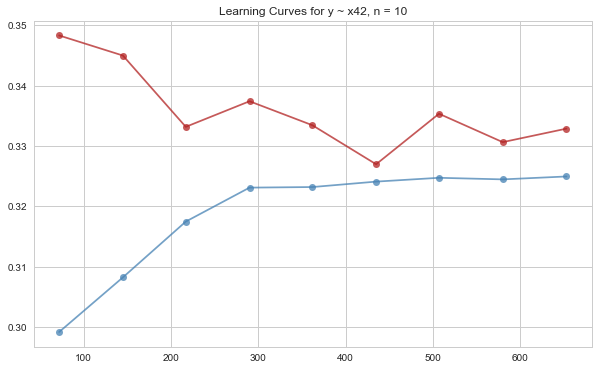

In [143]:
figure = plt.figure(figsize=(10,6))

axes = figure.add_subplot(1, 1, 1)

axes.plot( chunks, train, 'o-', color="steelblue", alpha=0.75)
axes.plot( chunks, test, "o-", color="firebrick", alpha=0.75)

axes.set_title( "Learning Curves for y ~ x42, n = 10")

Learning curves with feature selection (8 best features) do not converge although they are very close between 0.32 and 0.33. This suggests that getting more data will help the performance of our model. 

#### Validation Curve for a proper estimate of the generalization and assessing metaparameter values

In [144]:
def validation_curves( formulas, data, iterations=100, test_size=0.2):
    train = []
    test = []
    for formula in formulas:
        train_chunk = []
        test_chunk = []
        for i in range( iterations):
            train_mse, test_mse = cross_validate( formula, data, test_size=test_size)
            train_chunk.append( train_mse)
            test_chunk.append( test_mse)
        train.append( np.mean( train_chunk))
        test.append( np.mean( test_chunk))
    print(train)
    print(test)
    return train, test

#### Validation curve with 8 best features

In [146]:
xs = [1, 2, 3, 4, 5,6,7,8]
train, test = validation_curves(["Class ~ A9", 
                                 "Class ~ A11", 
                                 "Class ~ A8", 
                                 "Class ~ A15", 
                                 "Class ~ A3",
                                 "Class ~ A14",
                                 "Class ~ A2",
                                 "Class ~ A10"], data)

[0.33663419541935335, 0.45367850552163075, 0.46910488659396266, 0.4897182430625906, 0.48708110264644483, 0.49579941192617732, 0.4893737316210649, 0.44381105091919687]
[0.33038007189774221, 0.46502780183144715, 0.47152666168226304, 0.49993173786545175, 0.48753252707452321, 0.49771782305300166, 0.49155973099567801, 0.44554049361803744]


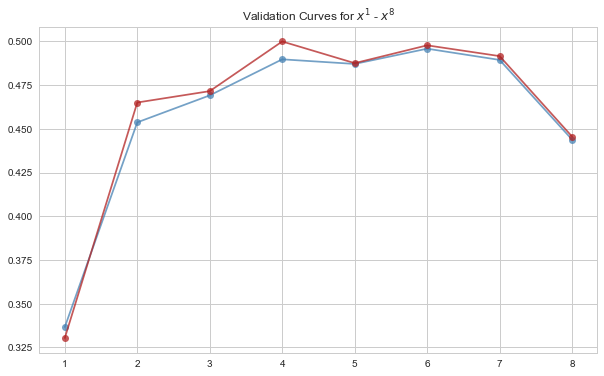

In [147]:
figure = plt.figure(figsize=(10,6))

axes = figure.add_subplot(1, 1, 1)

axes.plot( xs, train, 'o-', color="steelblue", alpha=0.75)
axes.plot( xs, test, "o-", color="firebrick", alpha=0.75)

axes.set_title( "Validation Curves for $x^1$ - $x^8$")

Visualizing Thresholding Decisions for choosing and understanding the modeling decisions that maximize business value

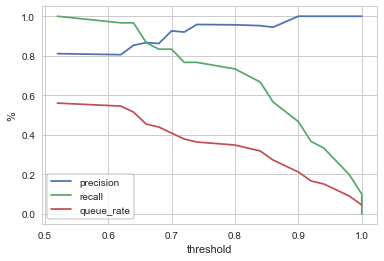

In [148]:
# Build the classifier and get the predictions 

clf = RandomForestClassifier(n_estimators=50, oob_score=True) 
test_size_percent = 0.1 
signals = data[[c for c in data.columns if c != 'Class']] 
labels = data['Class'] 
train_signals, test_signals, train_labels, test_labels = train_test_split(signals, labels, test_size=test_size_percent) 
clf.fit(train_signals, train_labels) 
predictions = clf.predict_proba(test_signals)[:,1]

precision, recall, thresholds = precision_recall_curve(test_labels, predictions) 
thresholds = np.append(thresholds, 1) 

queue_rate = [] 
for threshold in thresholds: 
    queue_rate.append((predictions >= threshold).mean()) 
    
plt.plot(thresholds, precision, color=sns.color_palette()[0]) 
plt.plot(thresholds, recall, color=sns.color_palette()[1]) 
plt.plot(thresholds, queue_rate, color=sns.color_palette()[2]) 

leg = plt.legend(('precision', 'recall', 'queue_rate'), frameon=True) 
leg.get_frame().set_edgecolor('k') 
plt.xlabel('threshold') 
plt.ylabel('%')

For a threshhold on the x-axis, we can see queue rate, precision, and recall expressed as percentages against the y axis. If we choose a threshhold of 0.5, then:

- about 40% of approved cases will be queued. In other words, approximately 391 cases will be selected for credit approval while 261 cases (40% of queued) for credit approval will be disapproved.

- our precision will be about 90%. So of the 40% cases that were queued, 90% will really be disapproved unless there is no intervention.

- recall will be approxiamtely 80%.

To decide whether the threshold 0.5 will be solely depended upon the credit company's priorities and stakeholder's strategic business plans and decisions.